Import the necessary libraries (if required)

In [2]:
import pandas as pd
import numpy as np

# Import Titanic Train and Test CSV files

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Show first five rows and 3 columns of dataframs

In [4]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Scatter Plot for 2D data, For Age and and Fare in Training Data, Try to conclude both relationships 

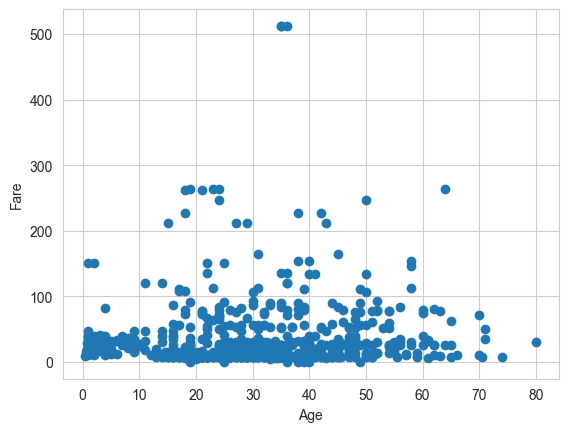

In [6]:
import matplotlib.pyplot as plt
plt.scatter(train_data['Age'], train_data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Check for missing values in both Train and Test

In [7]:
missing_train = train_data.isnull()
missing_test = test_data.isnull()

missing_train
missing_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


# How Much memory is used by Train and Test DataFram

In [8]:
memory_train_bytes = train_data.memory_usage(deep=True)
memory_test_bytes = test_data.memory_usage(deep=True)

memory_train_bytes, memory_test_bytes

(Index            128
 PassengerId     7128
 Survived        7128
 Pclass          7128
 Name           74813
 Sex            54979
 Age             7128
 SibSp           7128
 Parch           7128
 Ticket         56802
 Fare            7128
 Cabin          34344
 Embarked       51626
 dtype: int64,
 Index            128
 PassengerId     3344
 Pclass          3344
 Name           35314
 Sex            25802
 Age             3344
 SibSp           3344
 Parch           3344
 Ticket         26700
 Fare            3344
 Cabin          16022
 Embarked       24244
 dtype: int64)

# Number of null values in each features in both files

In [9]:
missing_train.sum(), missing_test.sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

# Find the total number of missing values from the both datafram

In [10]:
missing_values_train = train_data.isnull().sum().sum()
missing_values_test = test_data.isnull().sum().sum()

missing_values_train, missing_values_test


(np.int64(866), np.int64(414))

# Visualise the mising value heatmap

<Axes: >

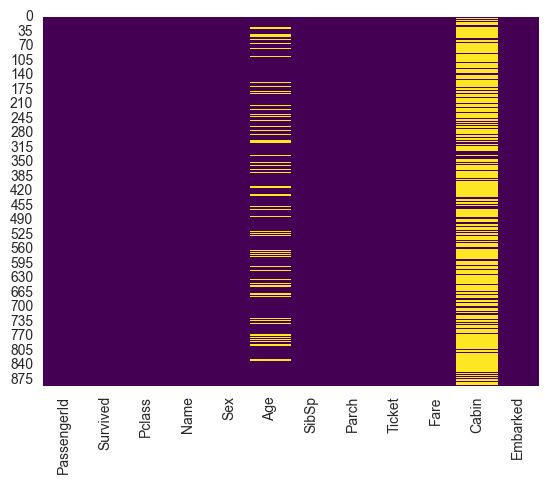

In [11]:
import seaborn as sns
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')

# Check Data Distribution of Fare, Age and mention their distributions

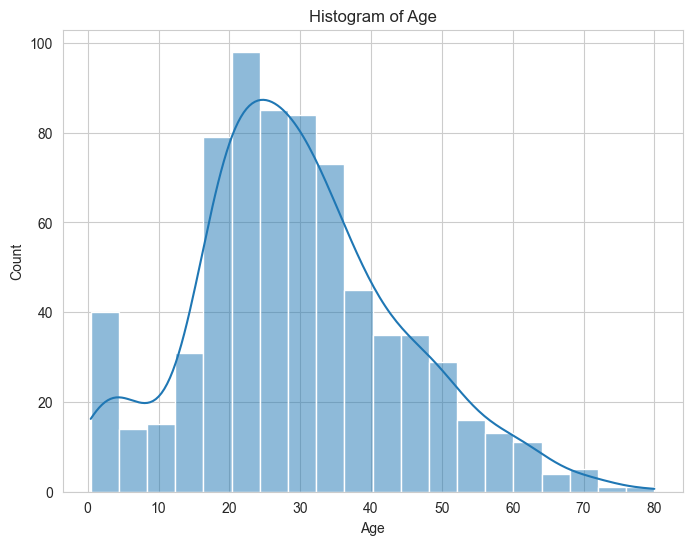

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_data['Age'], kde=True)  # KDE (Kernel Density Estimation) adds a smoothed curve
plt.title('Histogram of Age')
plt.show()

# Deletion of Missing Data
# Remove rows with any missing values from both datafram and save in different datafram and keep orignal one for further processing 

In [13]:
deletion_missing_train = train_data.dropna()
deletion_missing_test = test_data.dropna()

In [14]:
deletion_missing_train
deletion_missing_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S
...,...,...,...,...,...,...,...,...,...,...,...
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


# Mean/Median Imputation
# Fill missing values with the mean of the column, If you are getting error let me know and try to explain why this error happening and if there is no error explain it why their is no error

In [15]:
# Mean/Median Imputation
# Fill missing values with the mean of the column
mean_impute_train = train_data['Age'].fillna(train_data['Age'].mean())
mean_impute_test = test_data['Age'].fillna(test_data['Age'].mean())

# Display the imputed DataFrames
mean_impute_train
mean_impute_test

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

# Do same thing using IterativeImputer

In [16]:
# Do same thing using IterativeImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Create an IterativeImputer instance
iterative_imputer = IterativeImputer()

# Apply the imputer to the 'Age' column
Iterative_impute_train = iterative_imputer.fit_transform(train_data[['Age']])
Iterative_impute_test = iterative_imputer.transform(test_data[['Age']])

# Display the imputed DataFrames
print(Iterative_impute_train)
print(Iterative_impute_test)

[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]
 [35.        ]
 [34.        ]
 [15.        ]
 [28.        ]
 [ 8.        ]
 [38.        ]
 [29.69911765]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [40.        ]
 [29.69911765]
 [29.69911765]
 [66.        ]
 [28.        ]
 [42.        ]
 [29.69911765]
 [21.        ]
 [18.        ]
 [14.        ]
 [40.        ]
 [27.        ]
 [29.69911765]
 [ 3.        ]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [18.        ]
 [ 7.        ]
 [21.        ]
 [49.        ]
 [29.        ]
 [65.        ]
 [29.69911765]
 [21.        ]
 [28.5       ]
 [ 5.        ]
 [11.        ]
 [22.        ]
 [38.        ]
 [45.        ]
 [ 4.        ]
 [29.69911765]
 [29.69911765]
 [29.     

# Merge both dataset (How you will combine them perfectly?)

In [19]:
# Merge both datasets for analysis

# Add a column to distinguish between train and test data
train_data['Dataset'] = 'Train'
test_data['Dataset'] = 'Test'

# Concatenate the datasets
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Drop unnecessary column
combined_data.drop(columns=['PassengerId'], inplace=True)

# Display the first few rows of the combined dataset
combined_data.head()

# Note: Ensure that you do not use this combined dataset for training models to avoid data leakage.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Dataset
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Train
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Train
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Train
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Train
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Train
